# Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from google.colab import drive

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zygmunt/goodbooks-10k")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zygmunt/goodbooks-10k/versions/5


In [10]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [13]:
import zipfile
import os
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall(".")

print(os.listdir("."))
import pandas as pd

ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

print(ratings.head())

['.config', 'tags.csv', 'book_tags.csv', 'to_read.csv', 'books.csv', 'ratings.csv', 'archive.zip', 'sample_book.xml', 'sample_data']
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [14]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [15]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [16]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [17]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


# Data Exploration

**Missing values**

In [18]:
ratings.isna().sum()

,0
book_id,0
user_id,0
rating,0


In [19]:
books.isna().sum()

,0
id,0
book_id,0
best_book_id,0
work_id,0
books_count,0
isbn,700
isbn13,585
authors,0
original_publication_year,21
original_title,585


In [20]:
book_tags.isna().sum()

,0
goodreads_book_id,0
tag_id,0
count,0


In [21]:
tags.isna().sum()

,0
tag_id,0
tag_name,0


**Conclusion:** Data is clean, missing values are only in the columns that are not important

In [22]:
# range of ratings
print("Min rating:{}\nMax rating:{}".format(ratings['rating'].min(), ratings['rating'].max()))

Min rating:1
Max rating:5


**Checking if there are multiple ratings given by same user on same book**

In [23]:
count = 0
ratings_clean = ratings.drop_duplicates(["book_id", "user_id"])

In [24]:
print("No. of duplicate ratings: {}".format(ratings.shape[0]- ratings_clean.shape[0]))

No. of duplicate ratings: 2278


In [25]:
ratings = ratings_clean

**Checking the most frequent rating users give**

<Axes: >

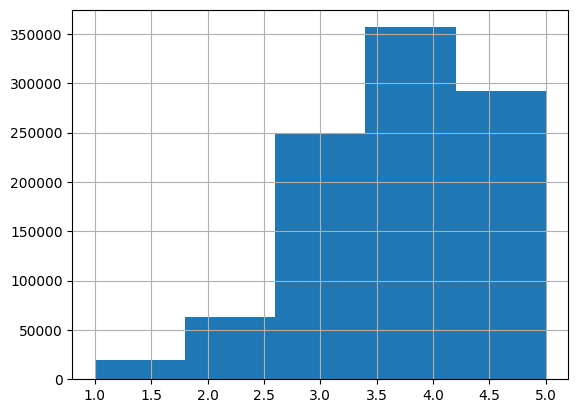

In [26]:
ratings['rating'].hist(bins=5)

Most users have given rating 4

In [27]:
# Dropping duplicates rows
books = books.drop_duplicates()
book_tags = book_tags.drop_duplicates()
tags= tags.drop_duplicates()

In [28]:
print("Total number of ratings all the users have given:{}".format(ratings.shape[0]))
print("Total number of unique users:{}".format(ratings['user_id'].nunique()))
print("Total number of books:{}".format(books.shape[0]))

Total number of ratings all the users have given:979478
Total number of unique users:53424
Total number of books:10000


#Approach

There are three main types of book recommendation systems:

1. **Popularity-Based**  
   Recommends books that are widely read or highly rated by others. It’s simple but not personalized.

2. **Content-Based Filtering**  
   Suggests books similar to what the user has read before (same genre, author, etc.). It’s personalized but can be limited to similar content.

3. **Collaborative Filtering**  
   Recommends books based on similar users’ preferences. For example, if User A and B liked the same books, a new book liked by A can be suggested to B.

For this project, we use **Collaborative Filtering** as it provides more personalized and varied recommendations.

## Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Creating embeddings that represent semantic relationship b/w users and books**

In [30]:
n_users = ratings['user_id'].nunique()
n_books = ratings['book_id'].nunique()

In [31]:
X = ratings[['user_id', 'book_id']].values
y = ratings.rating.values

**Splitting into train and test data**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_test.shape)

(783582, 2) (195896,)


In [33]:
X_train = [X_train[:, 0], X_train[:, 1]]
X_test = [X_test[:, 0], X_test[:, 1]]

**User embedding will represent user's personal taste, book embedding will represent book's characteristics**

In [34]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout, Lambda, Concatenate
from keras.models import Model, Sequential

In [35]:
emb_dim = 10

def recommender(num_users, num_books, emb_dim, min_rating, max_rating):
  user = Input(shape=(1,))
  user_emb = Embedding(num_users+1, emb_dim)
  user_vec = Flatten()(user_emb(user))

  book = Input(shape=(1,))
  book_emb = Embedding(num_books+1, emb_dim)
  book_vec = Flatten()(book_emb(book))

  merge = Concatenate()([book_vec, user_vec])

  x = Dense(16, kernel_initializer='he_normal', activation='relu')(merge)
  x = Dropout(0.5)(x)
  out = Dense(1, kernel_initializer='he_normal', activation='sigmoid')(x)
  out = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(out)

  model = Model([user, book], out)
  model.compile(optimizer='adam', loss='mse')

  return model

In [36]:
model = recommender(n_users, n_books, emb_dim, ratings.rating.min(), ratings.rating.max())
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 10)          │        100,010 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 10)          │        534,250 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 10)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 10)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20)             │              0 │ flatten_1[0][0],       │
│                           │                        │                │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │            336 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 16)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             17 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 634,613 (2.42 MB)

 Trainable params: 634,613 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
%%time
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 140s 11ms/step - loss: 0.8869 - val_loss: 0.7193
Epoch 2/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 143s 11ms/step - loss: 0.6968 - val_loss: 0.7050
Epoch 3/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 140s 11ms/step - loss: 0.6698 - val_loss: 0.7019
Epoch 4/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 147s 12ms/step - loss: 0.6516 - val_loss: 0.7003
Epoch 5/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 133s 11ms/step - loss: 0.6386 - val_loss: 0.7004
Epoch 6/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 134s 11ms/step - loss: 0.6297 - val_loss: 0.7023
Epoch 7/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 132s 11ms/step - loss: 0.6242 - val_loss: 0.7038
Epoch 8/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 142s 11ms/step - loss: 0.6137 - val_loss: 0.7066
Epoch 9/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 108s 9ms/step - loss: 0.6134 - val_loss: 0.7079
Epoch 10/10
12244/12244 ━━━━━━━━━━━━━━━━━━━━ 138s 8ms/step - loss: 0.6038 - val_loss: 0.7106
CPU times: user 26min 58s, sys: 1min 25s, total: 28min 24s
Wall time: 2

In [39]:
model.metrics_names

['loss']

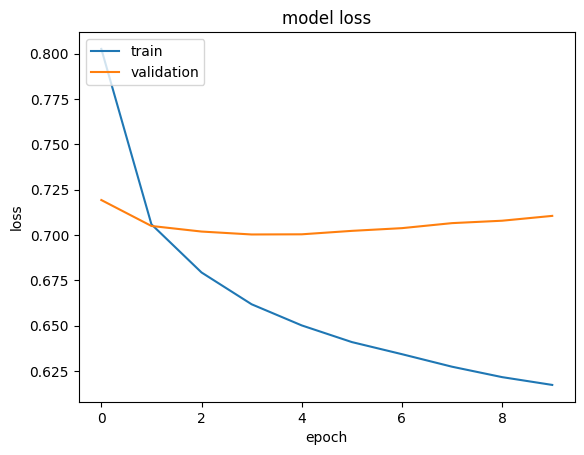

In [40]:

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
model.save('recommender_model.h5')

In [42]:
user_emb =model.get_layer(index=2)
book_emb = model.get_layer(index=3)

# Book recommendation

In [43]:
def recommend_books_for(user):
  emb_user = user_emb.get_weights()[0]
  emb_book = book_emb.get_weights()[0]


  books_ranked_for_user = (np.dot(emb_book, emb_user[user]))

  top_book_ids = np.argsort(books_ranked_for_user)[-5:]
  df = books[books.book_id.isin(top_book_ids)][['title', 'authors','average_rating']]
  return df

In [46]:
this_user = 4562

In [47]:
print("User {} has read:".format(this_user))
r = ratings[ratings['user_id']==4562].book_id
books[books['book_id'].isin(r)][['title', 'authors', 'average_rating']]

User 4562 has read:


,title,authors,average_rating
484,The Brothers Karamazov,"Fyodor Dostoyevsky, Richard Pevear, Larissa Vo...",4.30
2736,"The Big Bad Wolf (Alex Cross, #9)",James Patterson,3.97


In [48]:
print("Top recommendations for user {}".format(this_user))
top_books = recommend_books_for(this_user)
top_books

Top recommendations for user 4562


,title,authors,average_rating
1366,The Once and Future King (The Once and Future ...,T.H. White,4.08
